In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import warnings
from pathlib import Path
from pandas import date_range

import pycompo.core.composite as pccompo
import pycompo.core.utils as pcutil
import pycompo.core.plot as pcplot
import pycompo.core.significance_testing as pcsig

warnings.filterwarnings(action='ignore')

# read in configuration file
config_file = \
    "/home/m/m300738/libs/pycompo/config/settings_ngc5004_pc08.yaml"
config = pcutil.read_yaml_config(config_file)

start_time = config['data']['analysis_time'][0]
end_time = config['data']['analysis_time'][1]
analysis_times = [
    np.datetime64(t) for t in date_range(
        np.datetime64(start_time), np.datetime64(end_time), freq='MS',
        )
    ]
subgroup_vars = config['composite']['subgroup_vars']
analysis_idf = f"{config['exp']}_{config['pycompo_name']}"

### Read in composites

In [2]:
inpath = Path(f"{config['data']['outpath']}/{analysis_idf}/")

# read in composites
infile_compo = Path(f"{analysis_idf}_composite_alltrops_all.nc")
alltrops_compo = xr.open_dataset(str(inpath/infile_compo))

alltrops_quartile_compo = {}
rainbelt_quartile_compo = {}
for var in subgroup_vars:
    infile_compo = Path(f"{analysis_idf}_composite_alltrops_{var}_quartiles.nc")
    alltrops_quartile_compo[var] = xr.open_dataset(str(inpath/infile_compo))
        
if config['composite']['rainbelt_subsampling']['switch']:
    infile_compo = Path(f"{analysis_idf}_composite_rainbelt_all.nc")
    rainbelt_compo = xr.open_dataset(str(inpath/infile_compo))
    
    for var in subgroup_vars:
        infile_compo = Path(f"{analysis_idf}_composite_rainbelt_{var}_quartiles.nc")
        rainbelt_quartile_compo[var] = xr.open_dataset(str(inpath/infile_compo))

# read in p-values and calculate field significance
infile_pvalue = Path(f"{analysis_idf}_pvalue_alltrops_all.nc")
alltrops_pvalue = xr.open_dataset(str(inpath/infile_pvalue))
alltrops_sigmask = pcsig.get_field_significance(alltrops_pvalue, alpha_FDR=0.1)
if config['composite']['rainbelt_subsampling']['switch']:
    infile_pvalue = Path(f"{analysis_idf}_pvalue_rainbelt_all.nc")
    rainbelt_pvalue = xr.open_dataset(str(inpath/infile_pvalue))
    rainbelt_sigmask = pcsig.get_field_significance(
        rainbelt_pvalue, alpha_FDR=0.1
        )

nseg = 1
nseg = 1
nseg = 1
nseg = 1
nseg = 1
nseg = 1
nseg = 1
nseg = 1
nseg = 1
nseg = 1
nseg = 1
nseg = 1
nseg = 1
nseg = 1
nseg = 1
nseg = 1
nseg = 1
nseg = 1
nseg = 1
nseg = 1
nseg = 1
nseg = 1
nseg = 1
nseg = 1
nseg = 1
nseg = 1
nseg = 1
nseg = 1


### Visualization of composites

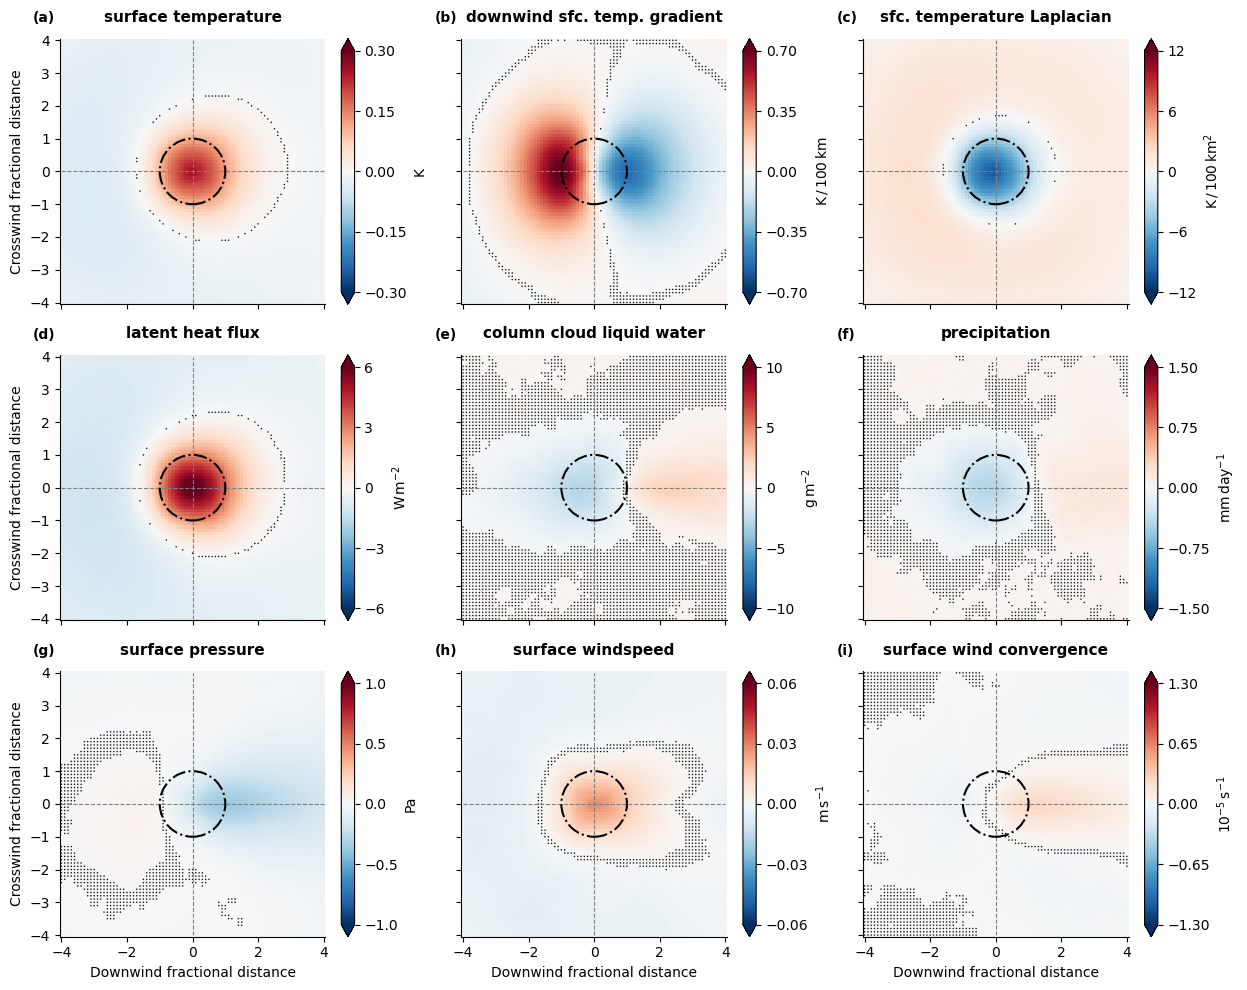

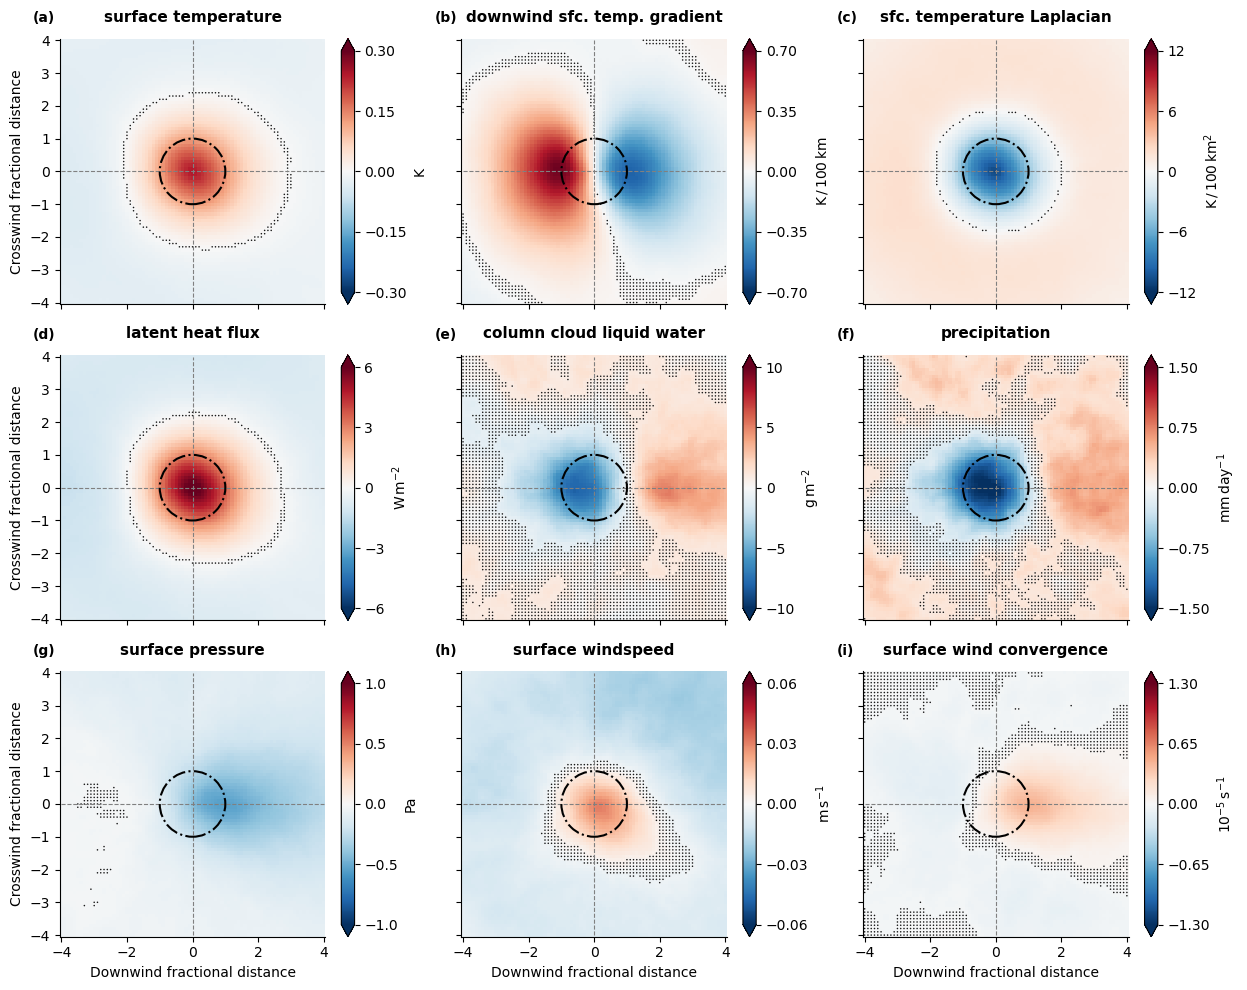

In [4]:
import importlib as implib
implib.reload(pcplot)

outpath = (
    f'/home/m/m300738/project_TRR181L4/plots/sst_feature_composites/' +
    f'{analysis_idf}'
)
Path(outpath).mkdir(parents=True, exist_ok=True)

vars = [
    'ts_ano', 'downwind_ts_ano_grad', 'ts_ano_laplacian', 'hfls_ano',
    'cllvi_ano', 'pr_ano', 'ps_ano', 'sfcwind_ano', 'sfcwind_conv_ano',
    ]

alltrops_compo_adjusted = pccompo.adjust_units(alltrops_compo, vars)
pcplot.plot_composite_overview(
    alltrops_compo_adjusted, vars=vars, sigmask=alltrops_sigmask,
    )
plt.savefig(
    f'{outpath}/{analysis_idf}_composite_alltrops_overview.png', dpi=600,
    )
plt.show()

rainbelt_compo_adjusted = pccompo.adjust_units(rainbelt_compo, vars)
pcplot.plot_composite_overview(
    rainbelt_compo_adjusted, vars=vars, sigmask=rainbelt_sigmask,
    )
plt.savefig(
    f'{outpath}/{analysis_idf}_composite_rainbelt_overview.png', dpi=600,
    )
plt.show()

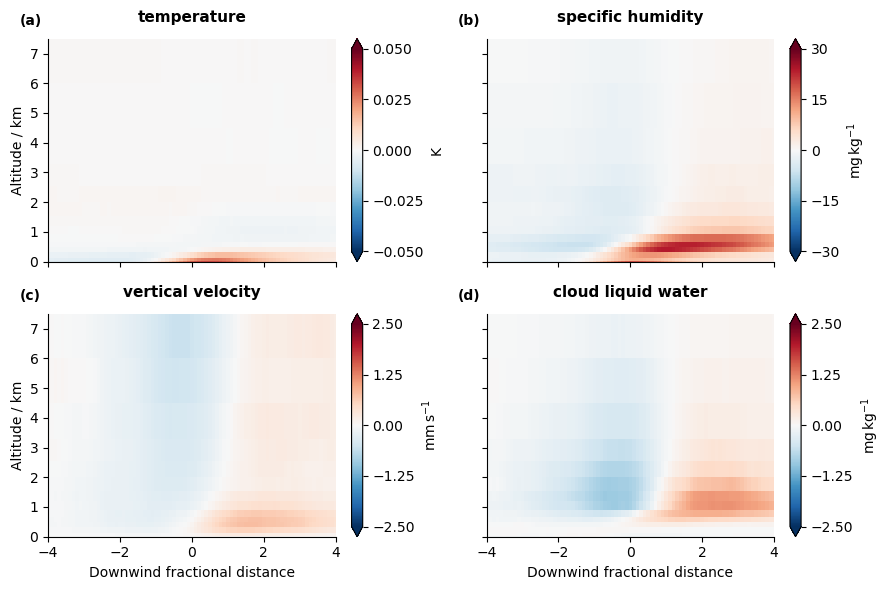

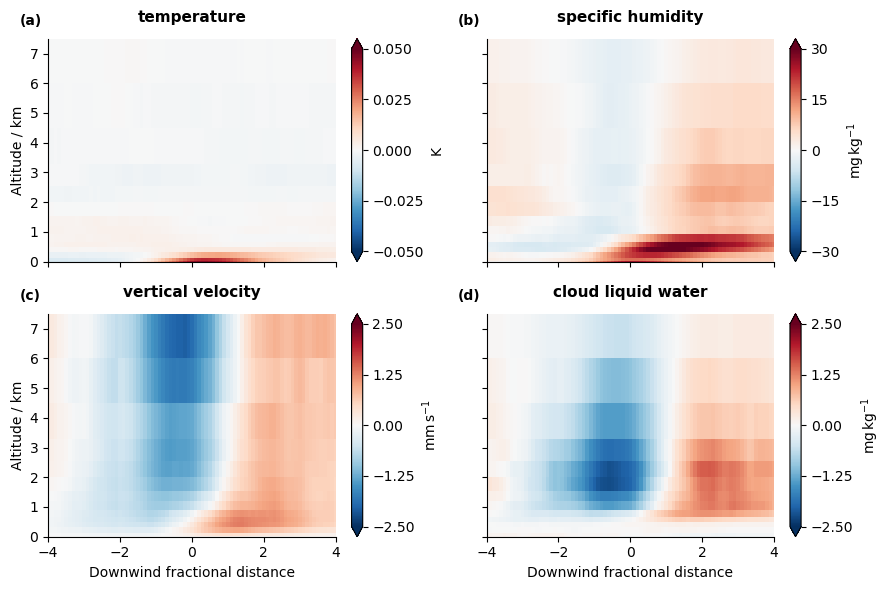

In [ ]:
import importlib as implib
implib.reload(pcplot)

outpath = (
    f'/home/m/m300738/project_TRR181L4/plots/sst_feature_composites/' +
    f'{analysis_idf}'
)
Path(outpath).mkdir(parents=True, exist_ok=True)

vars = ['ta_ano', 'hus_ano', 'wa_ano', 'clw_ano']
ysel = slice(38, 42)

alltrops_compo = pcutil.add_metric_altitude(alltrops_compo, config)
rainbelt_compo = pcutil.add_metric_altitude(rainbelt_compo, config)

alltrops_compo_adjusted = pccompo.adjust_units(alltrops_compo, vars)
pcplot.plot_compo_crosssection(alltrops_compo_adjusted, vars, ysel=ysel)
plt.savefig(
    f'{outpath}/{analysis_idf}_composite_crosssection_alltrops.png', dpi=600,
    )
plt.show()

rainbelt_compo_adjusted = pccompo.adjust_units(rainbelt_compo, vars)
pcplot.plot_compo_crosssection(rainbelt_compo_adjusted, vars, ysel=ysel)
plt.savefig(
    f'{outpath}/{analysis_idf}_composite_crosssection_rainbelt.png', dpi=600,
    )
plt.show()
